Mounting my Google drive into Google collab to have access to my dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


Importing all libraries required for the task


In [3]:
import pandas as pd
import io
import numpy as np  
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics       
%matplotlib inline

Navigating to the directory containing the dataset

In [ ]:
%cd "drive/MyDrive/TheSparksFoundation/Task_1"


Loading the DataFrame using Pandas library and printing it

In [7]:
df=pd.read_csv('dataset_task_1.csv')
df

/content/drive/MyDrive/TheSparksFoundation/Task_1


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Plotting the distribution of scores

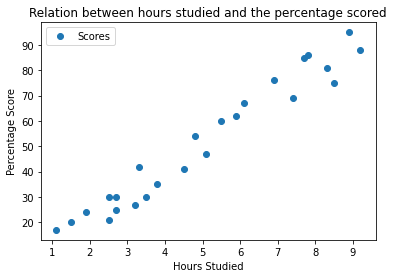

In [ ]:
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Relation between hours studied and the percentage scored')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

Storing the table columns in two different variables as array

X array represents Scores.

Y array represents percentage.



In [11]:
X = df.iloc[:, :-1].values  
Y = df.iloc[:, 1].values  
#Printing X for better understanding of viewers
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

Splitting X and Y in a manner that 80% is used for training and 20% for testing.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                            test_size=0.2, random_state=0) 
print("Successfully split the data")

Using LinearRegression to fit a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.


From the implementation point of view, this is just plain Ordinary Least Squares (scipy.linalg.lstsq) or Non Negative Least Squares (scipy.optimize.nnls) wrapped as a predictor object.



Reference: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html



In [15]:
regressor = LinearRegression().fit(X_train, y_train)
print("Training completed!")

Training complete.


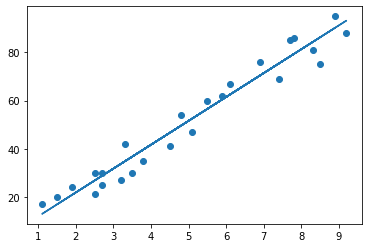

In [17]:
# Plots the regression line
line = regressor.coef_*X+regressor.intercept_

# Plots the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

In [18]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [ ]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [ ]:
Predicting data using the newly trained model

In [22]:
#lin_reg_2.predict(np.array([6.5]).reshape(1, 1))
hours = [9.25]
own_pred = regressor.predict(np.array(hours).reshape(-1, 1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [9.25]
Predicted Score = 93.69173248737539


Using sklearn Metrics to print Mean Absolute Error


In [23]:

print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
